In [368]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os as os   

In [369]:
os.chdir(os.path.abspath('C:\Program Files\My work'))
por = pd.read_csv('portfolio_returns_48.txt',delim_whitespace = 1)
fac = pd.read_csv('factors_ff.txt',delim_whitespace = 1)
a = pd.DataFrame(columns = por.columns)
b = pd.DataFrame(columns = por.columns)
ase = pd.DataFrame(columns = por.columns)

In [370]:
col_name = por.columns.values
rirf = pd.read_csv('portfolio_returns_48.txt',delim_whitespace = 1)
for i in col_name:
    rirf[i] = por.loc[:,i] - fac.iloc[:,3]

In [371]:
for i in col_name:
    olsi = sm.OLS(rirf.loc[:,i],sm.add_constant(np.array(fac.loc[:,"Mkt-RF"]))).fit()
    a.loc[1,i]=(pd.Series(olsi.params)[0])
    ase.loc[1,i]=(pd.Series(olsi.bse)[0])
    b.loc[1,i]=(pd.Series(olsi.params)[1])

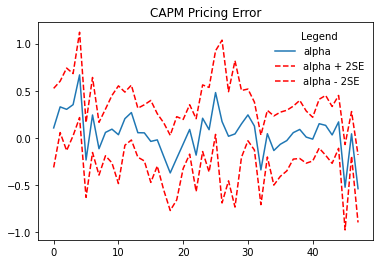

In [388]:
plt.plot(np.array(a).T,label = 'alpha')
plt.plot(np.array(a+2*ase).T,'r--',label = 'alpha + 2SE')
plt.plot(np.array(a-2*ase).T,'r--',label = 'alpha - 2SE')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("CAPM Pricing Error")
plt.savefig('CAPM Pricing Error',bbox_inches='tight') #save image

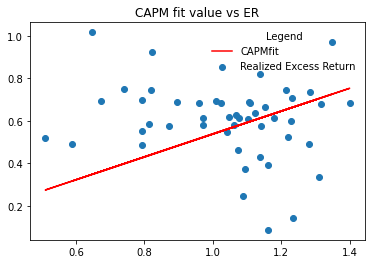

In [389]:
mer = np.mean(fac.loc[:,'Mkt-RF'])    #expected return of market excess return
rirfm = np.array(np.mean(rirf))
plt.plot(np.array(b).T,np.array(b).T*mer,'r-',label='CAPMfit')
plt.scatter(b.T,rirfm,label = 'Realized Excess Return')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("CAPM fit value vs ER")
plt.savefig("CAPM fit value vs ER",bbox_inches='tight')

In [374]:
fac

,Mkt-RF,SMB,HML,RF
196907,-7.00,-3.21,1.42,0.53
196908,4.68,0.94,-3.87,0.50
196909,-2.98,1.20,-3.19,0.62
196910,5.06,3.81,-3.19,0.60
196911,-3.79,-2.53,-1.12,0.52
...,...,...,...,...
201902,3.40,2.02,-2.84,0.18
201903,1.10,-3.15,-4.07,0.19
201904,3.96,-1.70,1.98,0.21
201905,-6.94,-1.26,-2.38,0.21


In [375]:
####2
aff = pd.DataFrame(columns = por.columns)
bff = pd.DataFrame(columns = por.columns)
aseff = pd.DataFrame(columns = por.columns)
for i in col_name:
    olsi = sm.OLS(rirf.loc[:,i],sm.add_constant(np.array(fac.loc[:,["Mkt-RF",'SMB','HML']]))).fit()
    aff.loc[1,i]=(pd.Series(olsi.params)[0])
    aseff.loc[1,i]=(pd.Series(olsi.bse)[0])
    bff.loc[1,i]=(pd.Series(olsi.params)[1])
    bff.loc[2,i]=(pd.Series(olsi.params)[2])
    bff.loc[3,i]=(pd.Series(olsi.params)[3])

In [376]:
bff

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1,0.811969,0.732457,0.885059,0.780384,0.727667,1.111182,1.295336,1.082136,0.822583,1.104825,...,1.009256,1.086871,0.98475,0.999841,1.013183,1.216623,1.060376,1.205491,1.252983,1.151262
2,0.355598,-0.194158,-0.16093,-0.174823,-0.313223,0.429206,0.405724,0.225242,-0.180091,0.333944,...,-0.104745,0.169573,0.392767,0.075989,0.154135,-0.150261,-0.165954,0.85684,0.126656,0.192253
3,0.044587,0.13547,0.212203,0.035446,0.120235,0.180068,0.140648,0.292357,-0.03038,0.363692,...,0.109209,0.332752,0.105925,0.032601,0.104556,0.64538,0.407321,0.772245,0.262775,0.153441


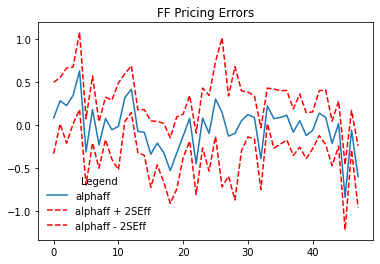

In [390]:
plt.plot(np.array(aff).T,label = 'alphaff')
plt.plot(np.array(aff+2*aseff).T,'r--',label = 'alphaff + 2SEff')
plt.plot(np.array(aff-2*aseff).T,'r--',label = 'alphaff - 2SEff')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("FF Pricing Errors")
plt.savefig("FF Pricing Errors",bbox_inches='tight')

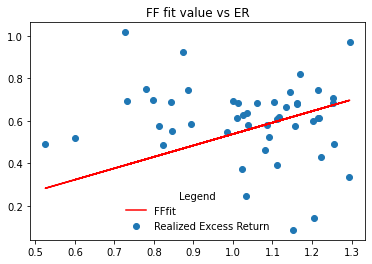

In [391]:
merff = np.mean(fac.loc[:,["Mkt-RF",'SMB','HML']])
rirfm = np.array(np.mean(rirf))
plt.plot(np.array(bff.iloc[0]).T,np.array(bff.iloc[0]).T*merff[0],'r-',label='FFfit')
plt.scatter(bff.iloc[0].T,rirfm,label = 'Realized Excess Return')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("FF fit value vs ER")
plt.savefig("FF1 fit value vs ER",bbox_inches='tight')

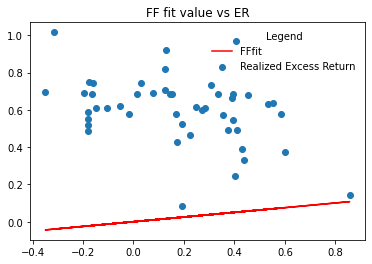

In [392]:
plt.plot(np.array(bff.iloc[1]).T,np.array(bff.iloc[1]).T*merff[1],'r-',label='FFfit')
plt.scatter(bff.iloc[1].T,rirfm,label = 'Realized Excess Return')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("FF fit value vs ER")
plt.savefig("FF2 fit value vs ER",bbox_inches='tight')

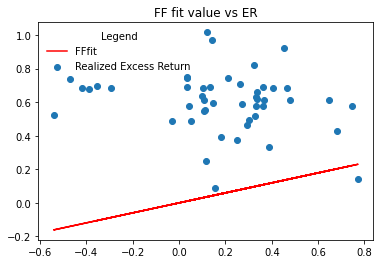

In [393]:
plt.plot(np.array(bff.iloc[2]).T,np.array(bff.iloc[2]).T*merff[2],'r-',label='FFfit')
plt.scatter(bff.iloc[2].T,rirfm,label = 'Realized Excess Return')
plt.legend(loc = 0,frameon = False,title = "Legend")
plt.title("FF fit value vs ER")
plt.savefig("FF3 fit value vs ER",bbox_inches='tight')

In [396]:
###3
bwc = sm.add_constant(bff.T)
g = pd.DataFrame(columns = rirf.index,dtype = float)

for i in range(len(rirf.index)):
    olsi = sm.OLS(np.array(rirf.iloc[i,:]),np.array(bwc,dtype=float)).fit()
    g.iloc[:,i] = pd.Series(olsi.params[1:])

In [397]:
g = g.T

In [403]:
g.columns = ["Mkt-RF",'SMB','HML']

In [399]:
T = len(g.index)
gm = g.mean()
gt = gm/(g.std()/np.sqrt(T))

In [402]:
model = sm.OLS(np.array(rirfm),sm.add_constant(np.array(bff.T,dtype=float))).fit()

In [386]:
g_tilde = pd.Series(model.params[1:])
g_tilde.index = ["Mkt-RF",'SMB','HML']
g_tilde_tstat = pd.Series(model.tvalues[1:])
g_tilde_tstat.index = ["Mkt-RF",'SMB','HML']

In [387]:
print(pd.concat((gm,g_tilde),axis = 1))
print(pd.concat((gt,g_tilde_tstat),axis = 1))

               0         1
Mkt-RF  0.100168  0.100168
SMB    -0.270749 -0.270749
HML    -0.102015 -0.102015
               0         1
Mkt-RF  0.300336  0.650446
SMB    -1.432786 -2.678512
HML    -0.634199 -1.197516
